<a href="https://colab.research.google.com/github/nieyangfei/EGG_Big_Data/blob/main/lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Installing Packages for Task 2
install.packages('factoextra')
install.packages('cluster')
library(datasets) # Will be used in final task
library(factoextra)
library(cluster)

# Load the USArrests dataset
df <- USArrests
# Remove rows with missing values
df <- na.omit(df)
# Scale each variable to have a mean of 0 and standard deviation of 1
df <- scale(df)
# View the first six rows of the scaled dataset
head(df)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘Deriv’, ‘microbenchmark’, ‘Rdpack’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘lazyeval’, ‘carData’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘crosstalk’, ‘estimability’, ‘mvtnorm’, ‘numDeriv’, ‘corrplot’, ‘viridis’, ‘car’, ‘DT’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘leaps’, ‘multcompView’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘ggrepel’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



,Murder,Assault,UrbanPop,Rape
Alabama,1.24256408,0.7828393,-0.5209066,-0.003416473
Alaska,0.50786248,1.1068225,-1.2117642,2.484202941
Arizona,0.07163341,1.4788032,0.9989801,1.042878388
Arkansas,0.23234938,0.2308680,-1.0735927,-0.184916602
California,0.27826823,1.2628144,1.7589234,2.067820292
Colorado,0.02571456,0.3988593,0.8608085,1.864967207


# Task 1&2: Setting Up & Loading Packages and Preparing Data

# Task 3: Finding the Optimal Number of Clusters

##  The Elbow Method

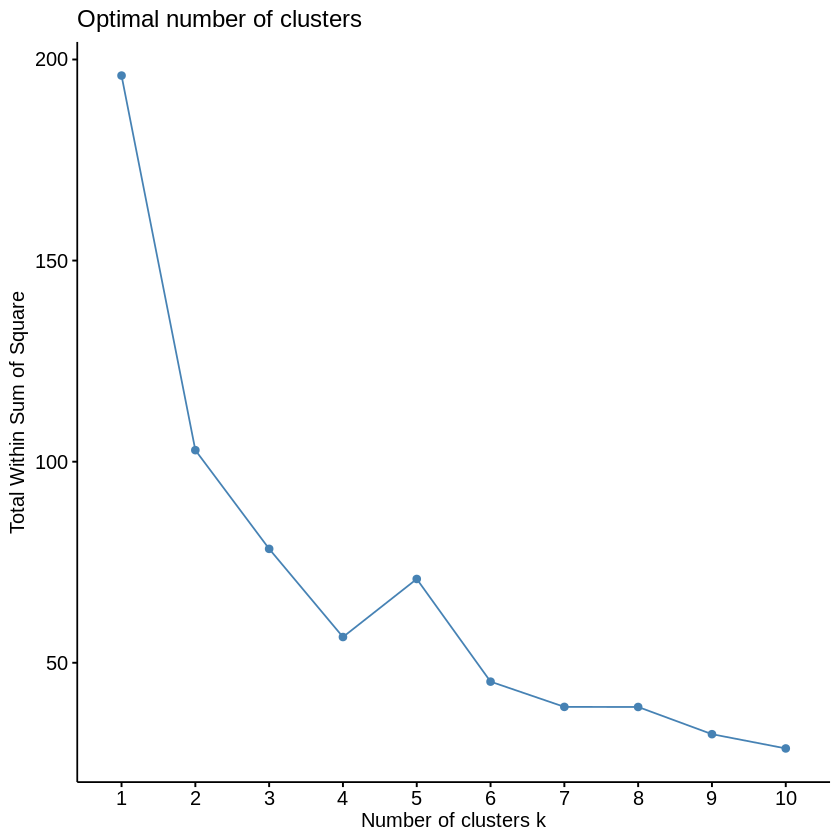

In [2]:
# Use the fviz_nbclust function, providing kmeans as clustering function and
# wss as method.
elbow_plot <- fviz_nbclust(df, kmeans, method = "wss", k.max = 10)
# Print the elbow plot
print(elbow_plot)

## The Gap Statistic

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.
ℹ The deprecated feature was likely used in the factoextra package.
  Please report the issue at <https://github.com/kassambara/factoextra/issues>.”


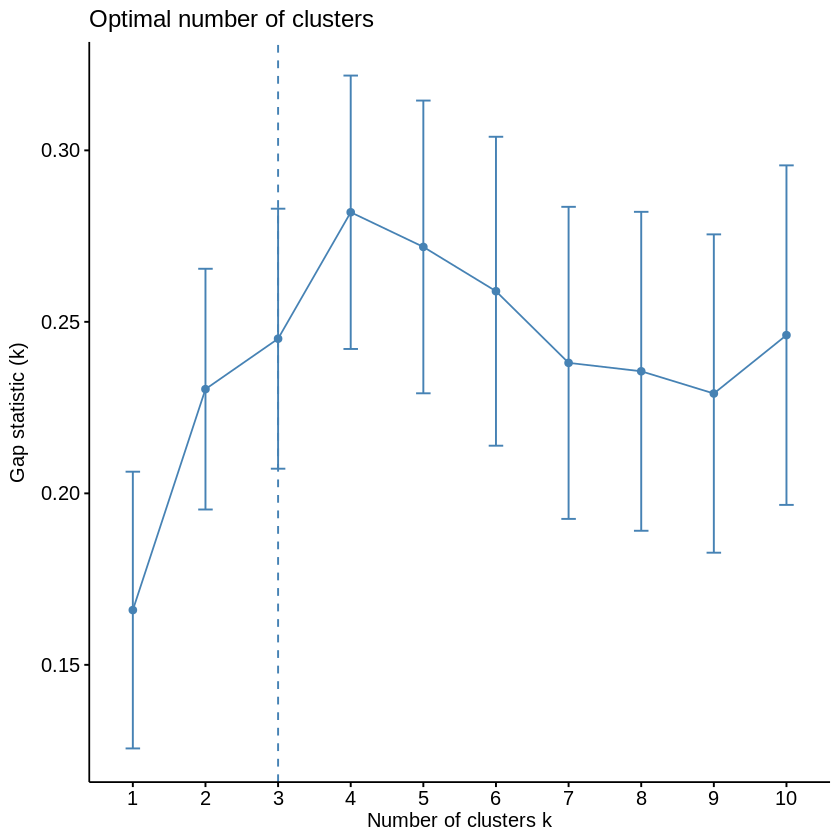

In [4]:
#calculate gap statistic based on number of clusters
gap_stat <- clusGap(df, FUN = kmeans, nstart = 25, K.max = 10, B = 50)
fviz_gap_stat(gap_stat)

4 clusters are the ideal.

# Task 4: Performing and Visualizing K-Means Clustering

K-means clustering with 4 clusters of sizes 13, 13, 16, 8

Cluster means:
      Murder    Assault   UrbanPop        Rape
1 -0.9615407 -1.1066010 -0.9301069 -0.96676331
2  0.6950701  1.0394414  0.7226370  1.27693964
3 -0.4894375 -0.3826001  0.5758298 -0.26165379
4  1.4118898  0.8743346 -0.8145211  0.01927104

Clustering vector:
       Alabama         Alaska        Arizona       Arkansas     California 
             4              2              2              4              2 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              3              3              2              4 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              1              2              3              1 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              1              4              1              2 
 Massachusetts       Michigan      Minnesota    Mississippi    

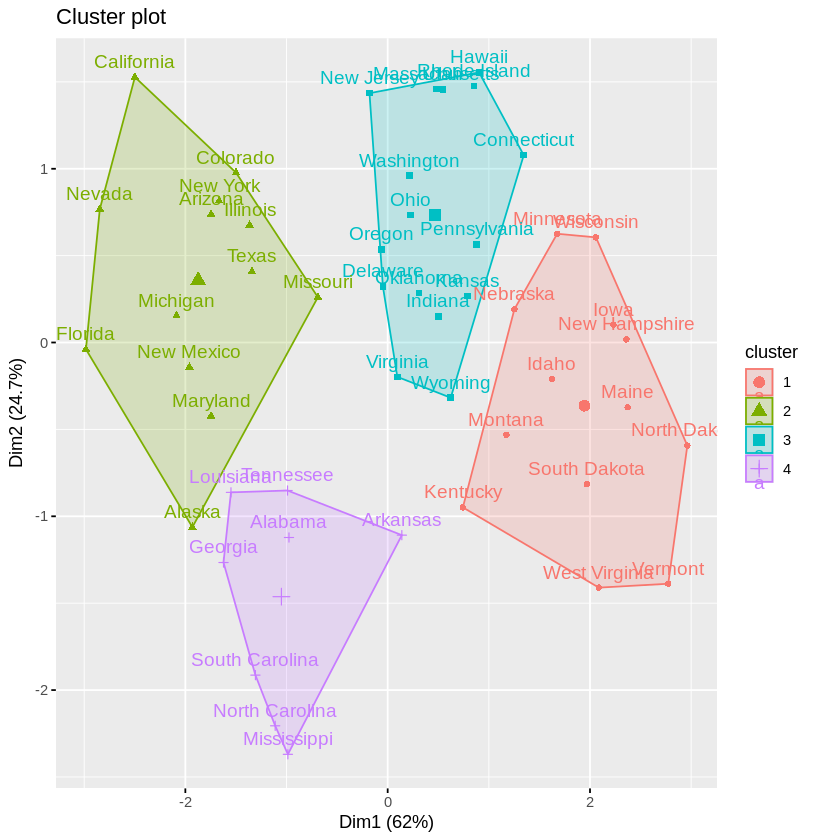

In [6]:
# Set a seed for reproducibility
set.seed(1)
# Perform K-means clustering with k = 4 clusters and nstart = 25
km <- kmeans(df, centers = 4, nstart = 25)
# View the results
km
# View
fviz_cluster(km, df)

In [7]:
# Find the means of each cluster on the original (unscaled) data
cluster_means <- aggregate(USArrests, by = list(Cluster = km$cluster), FUN = mean)
# Print the cluster means
print(cluster_means)
# Add cluster assigment to original data
final_data <- cbind(USArrests, cluster = km$cluster)
# View final data
head(final_data)


  Cluster   Murder   Assault UrbanPop     Rape
1       1  3.60000  78.53846 52.07692 12.17692
2       2 10.81538 257.38462 76.00000 33.19231
3       3  5.65625 138.87500 73.87500 18.78125
4       4 13.93750 243.62500 53.75000 21.41250


,Murder,Assault,UrbanPop,Rape,cluster
,<dbl>,<int>,<int>,<dbl>,<int>
Alabama,13.2,236,58,21.2,4
Alaska,10.0,263,48,44.5,2
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,4
California,9.0,276,91,40.6,2
Colorado,7.9,204,78,38.7,2


# Task 5: Additional Practice

## Clustering the Iris Dataset

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
,<dbl>,<dbl>,<dbl>,<dbl>
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
6,5.4,3.9,1.7,0.4


Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
-0.8976739,1.01560199,-1.335752,-1.311052
-1.1392005,-0.13153881,-1.335752,-1.311052
-1.3807271,0.32731751,-1.392399,-1.311052
-1.5014904,0.09788935,-1.279104,-1.311052
-1.0184372,1.24503015,-1.335752,-1.311052
-0.5353840,1.93331463,-1.165809,-1.048667


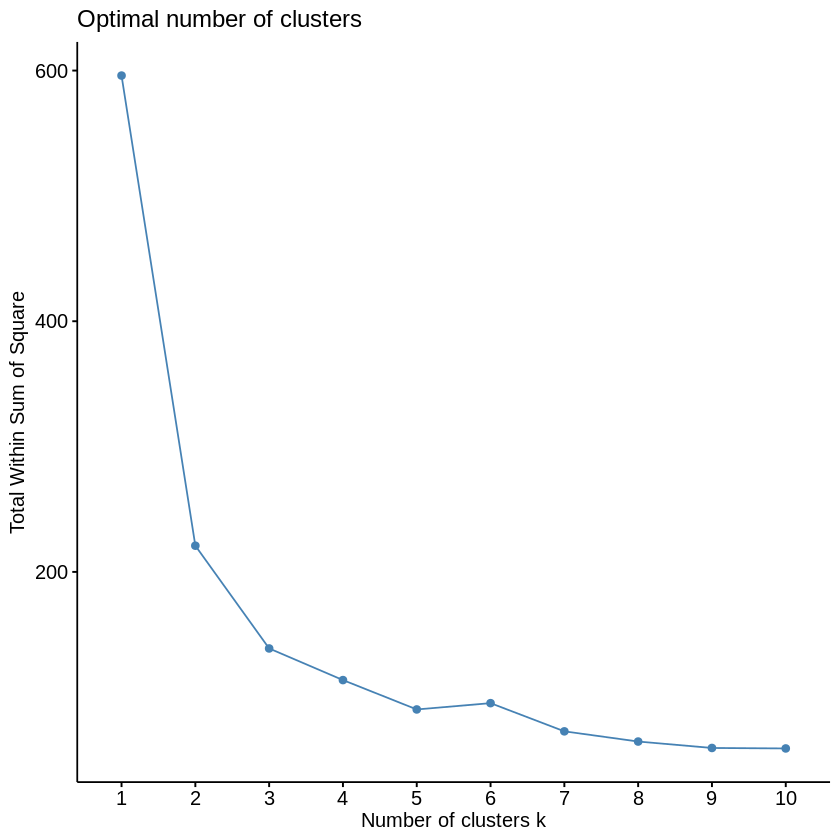

In [17]:
#Load the iris dataset with the data() function. Create a new data frame containing only the first four columns (the numeric measurements)
data(iris)
head(iris)
iris_attribute <- iris[,1:4]
head(iris_attribute)
# Scale your new data frame.
iris_attribute <- scale(iris_attribute)
head(iris_attribute)

# Use the Elbow Method (fviz nbclust) to find the optimal number of clusters. Does the result make sense given what you know about the dataset?
# wss as method.
elbow_plot <- fviz_nbclust(iris_attribute, kmeans, method = "wss", k.max = 10)
# Print the elbow plot
print(elbow_plot)





Well, I Googled and find that there are three types of Iris but the elbow shows that there are five types.

K-means clustering with 5 clusters of sizes 23, 25, 29, 48, 25

Cluster means:
  Sepal.Length Sepal.Width Petal.Length Petal.Width
1   -0.3516137  -1.3285553    0.1026061  0.01228268
2   -0.7189442   1.5019897   -1.2972312 -1.21659342
3    1.3926646   0.2323817    1.1567451  1.21327591
4    0.3804044  -0.3896455    0.6067908  0.56390985
5   -1.3034386   0.1988377   -1.3040289 -1.28481361

Clustering vector:
  [1] 2 5 5 5 2 2 5 5 5 5 2 5 5 5 2 2 2 2 2 2 2 2 2 5 5 5 5 2 2 5 5 2 2 2 5 5 2
 [38] 2 5 5 2 5 5 2 2 5 2 5 2 5 3 4 3 1 4 4 4 1 4 1 1 4 1 4 1 4 4 1 1 1 4 4 4 4
 [75] 4 4 4 4 4 1 1 1 1 4 4 4 4 1 4 1 1 4 1 1 1 4 4 4 1 1 3 4 3 4 3 3 1 3 4 3 3
[112] 4 3 4 4 3 4 3 3 1 3 4 3 4 3 3 4 4 4 3 3 3 4 4 4 3 3 4 4 3 3 3 4 3 3 3 4 4
[149] 3 4

Within cluster sum of squares by cluster:
[1] 13.686590 12.147537 26.891293 27.830133  9.646348
 (between_SS / total_SS =  84.9 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size

   
    setosa versicolor virginica
  1      0         21         2
  2     25          0         0
  3      0          2        27
  4      0         27        21
  5     25          0         0

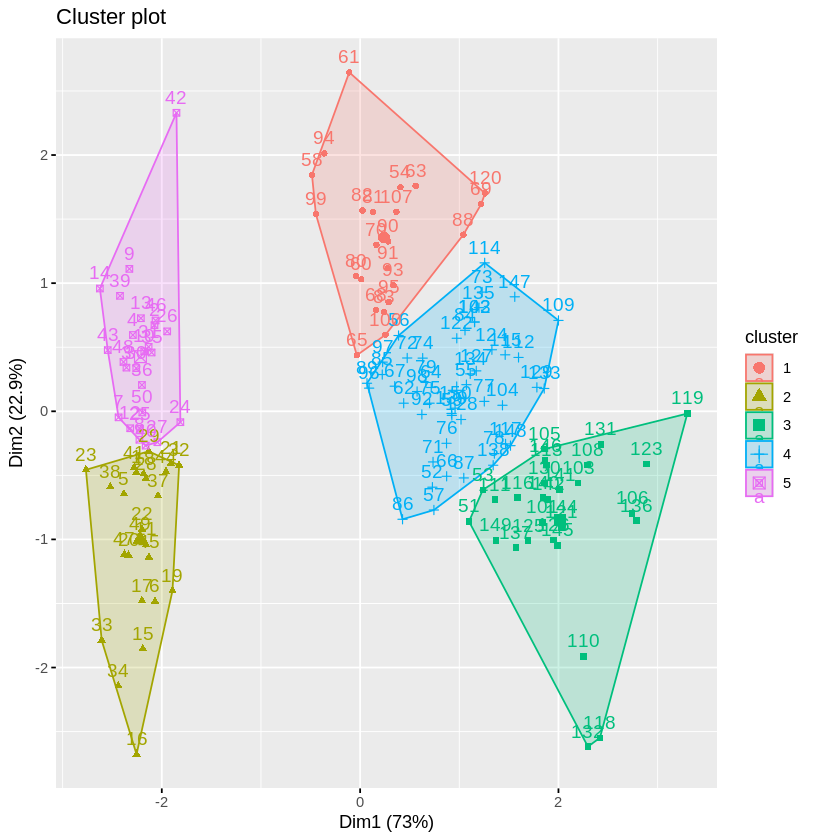

In [23]:
# Set a seed for reproducibility
set.seed(1)
# Perform K-means clustering with k = 5 clusters and nstart = 25
km <- kmeans(iris_attribute, centers = 5, nstart = 25)
# View the results
km
# View
fviz_cluster(km, iris_attribute)
# Challenge: How well did the clustering work? Compare your cluster assignments with the actual species using the command table(your kmeans result$cluster, iris$Species).
table(km$cluster, iris$Species)


Well, my K-means tangles some actual species into one group.

## Clustering the mtcars Dataset

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,0.1508848,-0.1049878,-0.57061982,-0.5350928,0.5675137,-0.610399567,-0.7771651,-0.8680278,1.1899014,0.4235542,0.7352031
Mazda RX4 Wag,0.1508848,-0.1049878,-0.57061982,-0.5350928,0.5675137,-0.349785269,-0.4637808,-0.8680278,1.1899014,0.4235542,0.7352031
Datsun 710,0.4495434,-1.2248578,-0.99018209,-0.7830405,0.4739996,-0.917004624,0.4260068,1.1160357,1.1899014,0.4235542,-1.1221521
Hornet 4 Drive,0.2172534,-0.1049878,0.22009369,-0.5350928,-0.9661175,-0.002299538,0.8904872,1.1160357,-0.8141431,-0.9318192,-1.1221521
Hornet Sportabout,-0.2307345,1.0148821,1.04308123,0.4129422,-0.8351978,0.227654255,-0.4637808,-0.8680278,-0.8141431,-0.9318192,-0.5030337
Valiant,-0.3302874,-0.1049878,-0.04616698,-0.6080186,-1.5646078,0.248094592,1.3269868,1.1160357,-0.8141431,-0.9318192,-1.1221521


K-means clustering with 4 clusters of sizes 12, 7, 5, 8

Cluster means:
         mpg        cyl        disp         hp        drat          wt
1 -0.8363478  1.0148821  1.02385129  0.6924910 -0.88974768  0.90635862
2  0.1082193 -0.5849321 -0.44867013 -0.6496905 -0.04967936 -0.02346989
3 -0.2639188  0.3429602 -0.05907659  0.7600688  0.44781564 -0.22101115
4  1.3247791 -1.2248578 -1.10626771 -0.9453003  1.09820619 -1.20086981
        qsec         vs         am       gear       carb
1 -0.3952280 -0.8680278 -0.8141431 -0.9318192  0.1676779
2  1.1854841  1.1160357 -0.8141431 -0.1573201 -0.4145882
3 -1.2494801 -0.8680278  1.1899014  1.2367782  1.4781451
4  0.3364684  0.8680278  1.1899014  0.7623975 -0.8125929

Clustering vector:
          Mazda RX4       Mazda RX4 Wag          Datsun 710      Hornet 4 Drive 
                  3                   3                   4                   2 
  Hornet Sportabout             Valiant          Duster 360           Merc 240D 
                  1      

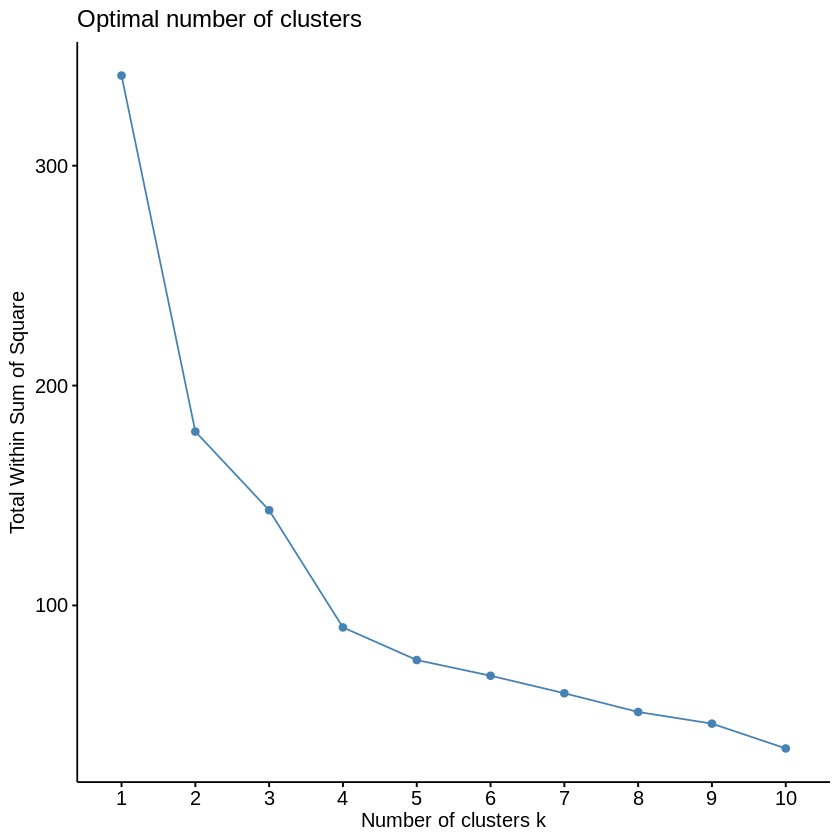

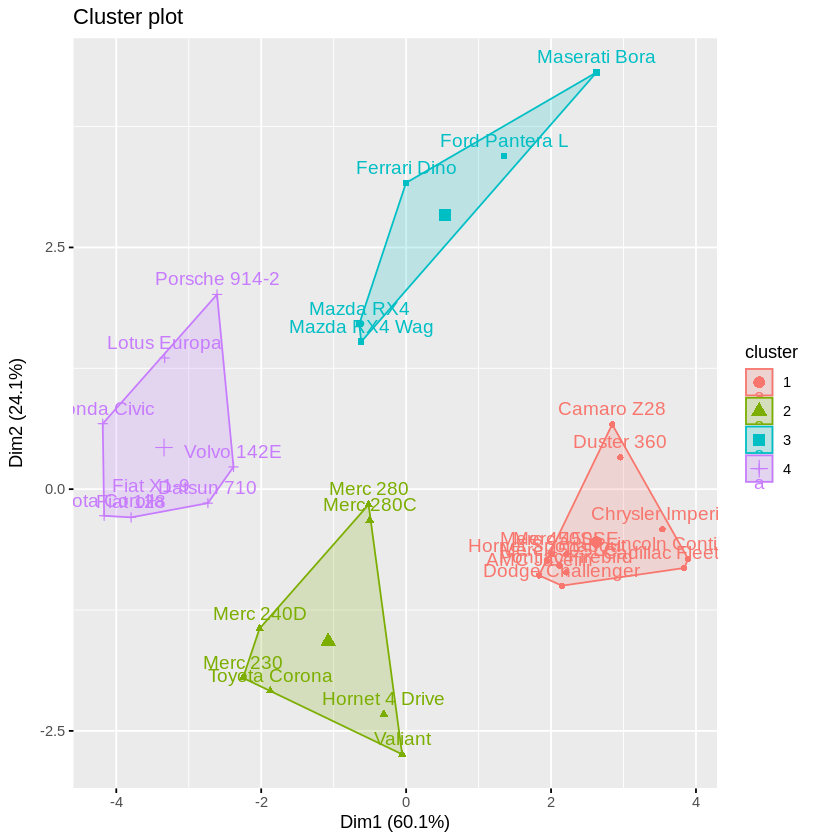

In [25]:
#Load the dataset with the data() function.
data(mtcars)
head(mtcars)
# Scale your new data frame.
mtcars <- scale(mtcars)
head(mtcars)

# Use the Elbow Method (fviz nbclust) to find the optimal number of clusters. Does the result make sense given what you know about the dataset?
# wss as method.
elbow_plot <- fviz_nbclust(mtcars, kmeans, method = "wss", k.max = 10)
# Print the elbow plot
print(elbow_plot)

# Set a seed for reproducibility
set.seed(1)
# Perform K-means clustering with k = 4 clusters and nstart = 25
km <- kmeans(mtcars, centers = 4, nstart = 25)
# View the results
km
# View
fviz_cluster(km, mtcars)




## Clustering Air Quality Data

[1] "part 1"

,Ozone,Solar.R,Wind,Temp,Month,Day
,<int>,<int>,<dbl>,<int>,<int>,<int>
1,41,190,7.4,67,5,1
2,36,118,8.0,72,5,2
3,12,149,12.6,74,5,3
4,18,313,11.5,62,5,4
5,NA,NA,14.3,56,5,5
6,28,NA,14.9,66,5,6


,Ozone,Solar.R,Wind,Temp,Month,Day
1,-0.03302982,0.05702761,-0.7138405,-1.1325108,-1.504117,-1.7165054
2,-0.18328840,-0.73285918,-0.5451928,-0.6078501,-1.504117,-1.6016578
3,-0.90452961,-0.39276904,0.7477726,-0.3979858,-1.504117,-1.4868103
4,-0.72421931,1.40641756,0.4385852,-1.6571715,-1.504117,-1.3719627
7,-0.57396073,1.25282846,-0.3765451,-1.3423751,-1.504117,-1.0274200
8,-0.69416759,-0.94130153,1.0850679,-1.9719679,-1.504117,-0.9125725


[1] "part 2"

[1] "part 2-2"

[1] "part 3"

K-means clustering with 4 clusters of sizes 44, 20, 29, 18

Cluster means:
       Ozone    Solar.R       Wind       Temp       Month        Day
1 -0.4981484 -0.3411571  0.2661046 -0.1308859  0.77873882  0.1419369
2  1.0353087  0.4141223 -0.7728671  1.0710640  0.26046896 -1.1996914
3 -0.6755148 -0.1256905  0.6334023 -1.0782355 -1.31689259 -0.1125998
4  1.1556826  0.5763050 -0.8122183  0.8670293 -0.07133344  1.1674444

Clustering vector:
  1   2   3   4   7   8   9  12  13  14  15  16  17  18  19  20  21  22  23  24 
  3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3 
 28  29  30  31  38  40  41  44  47  48  49  50  51  62  63  64  66  67  68  69 
  3   3   4   4   3   2   2   1   3   3   3   3   3   2   2   2   2   2   2   2 
 70  71  73  74  76  77  78  79  80  81  82  85  86  87  88  89  90  91  92  93 
  2   2   3   1   1   4   1   4   4   4   1   4   4   1   1   4   4   4   4   2 
 94  95  99 100 101 104 105 106 108 109 110 111 112 113 114 116 117 118 12

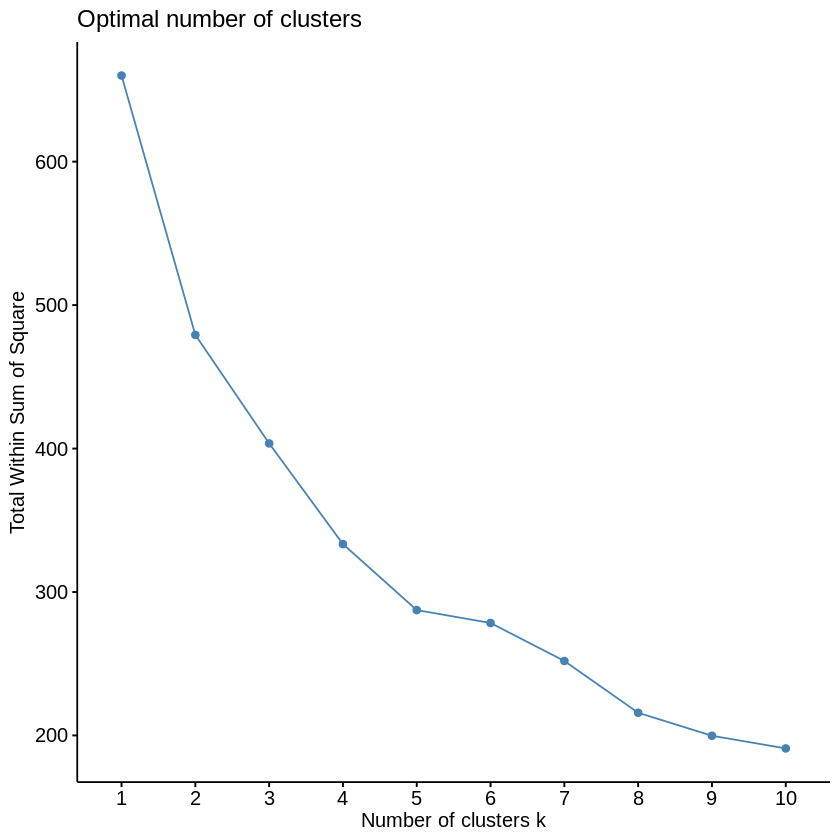

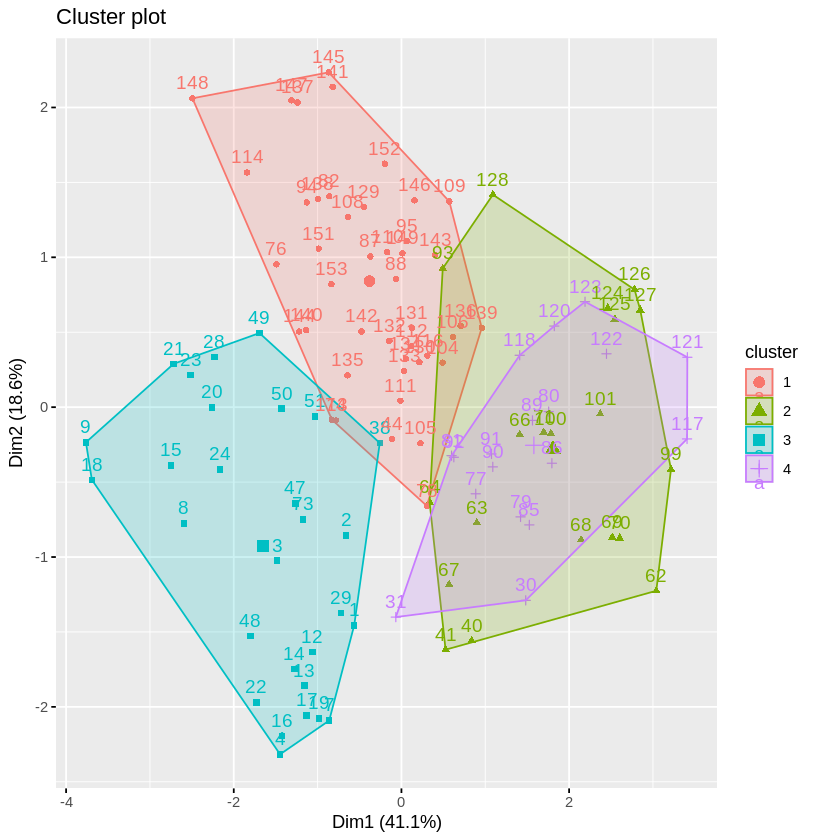

In [29]:
#Load the dataset with the data() function.
data(airquality)
head(airquality)
# Remove rows with missing values
airquality <- na.omit(airquality)
# Scale your new data frame.
airquality <- scale(airquality)
head(airquality)

# Use the Elbow Method (fviz nbclust) to find the optimal number of clusters. Does the result make sense given what you know about the dataset?
# wss as method.
elbow_plot <- fviz_nbclust(airquality, kmeans, method = "wss", k.max = 10)
# Print the elbow plot
print(elbow_plot)

# Set a seed for reproducibility
set.seed(1)
# Perform K-means clustering with k = 4 clusters and nstart = 25
km <- kmeans(airquality, centers = 4, nstart = 25)
# View the results
km
# View
fviz_cluster(km, airquality)